# Data Exploration

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette('Blues_d')[0:5]

In [82]:
train_df = pd.read_csv('files/training_set_VU_DM.csv')
test_df = pd.read_csv('files/test_set_VU_DM.csv')
train_df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [83]:
train_df.shape

(4958347, 54)

In [84]:
train_df.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [85]:
train_df.duplicated().sum()

0

In [86]:
test_df.shape

(4959183, 50)

In [87]:
test_df.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4705752
visitor_hist_adr_usd           4704559
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7266
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1088032
prop_log_historical_price            0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4641025
orig_destination_distance      1608679
random_bool              

In [88]:
# check for extreme values where the column name does not contain 'id'
temp = train_df.loc[:, ~train_df.columns.str.contains('id')]
temp = temp.loc[:, ~temp.columns.str.contains('bool')]

In [89]:
temp.describe()

,visitor_hist_starrating,visitor_hist_adr_usd,prop_starrating,prop_review_score,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,...,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,gross_bookings_usd
count,251866.000000,252988.000000,4.958347e+06,4.950983e+06,4.958347e+06,3.867999e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,...,240157.000000,260976.000000,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,138390.000000
mean,3.374334,176.022659,3.180525e+00,3.777777e+00,2.872589e+00,1.303852e-01,4.317913e+00,1.685624e+01,2.542096e+02,2.156198e-01,...,0.128329,0.075957,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,386.283316
std,0.692519,107.254493,1.051024e+00,1.050329e+00,1.531011e+00,1.594634e-01,1.834869e+00,1.042566e+01,1.600124e+04,4.112517e-01,...,0.559841,0.302668,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,821.190577
min,1.410000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000
25%,2.920000,109.810000,3.000000e+00,3.500000e+00,1.790000e+00,1.900000e-02,4.450000e+00,8.000000e+00,8.500000e+01,0.000000e+00,...,0.000000,0.000000,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,124.000000
50%,3.450000,152.240000,3.000000e+00,4.000000e+00,2.770000e+00,6.900000e-02,4.910000e+00,1.600000e+01,1.220000e+02,0.000000e+00,...,0.000000,0.000000,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,218.400000
75%,3.930000,213.490000,4.000000e+00,4.500000e+00,4.040000e+00,1.805000e-01,5.310000e+00,2.600000e+01,1.849600e+02,0.000000e+00,...,0.000000,0.000000,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,429.790000
max,5.000000,1958.700000,5.000000e+00,5.000000e+00,6.980000e+00,1.000000e+00,6.210000e+00,4.000000e+01,1.972633e+07,1.000000e+00,...,1.000000,1.000000,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,159292.380000


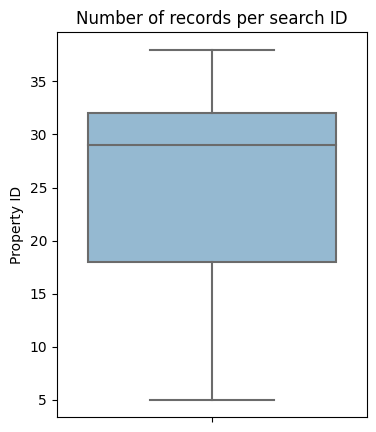

In [90]:
# plotting the number of records per search id
temp = train_df.groupby('srch_id').count()['prop_id'].reset_index()

# plot the number of records per search id as boxplot and make y-axis the property id
plt.figure(figsize=(4, 5))
sns.boxplot(y='prop_id', data=temp, color=colors[0])
plt.ylabel('Property ID')
plt.title('Number of records per search ID')
plt.show()

In [91]:
# general statistics of properties per search id
temp["prop_id"].describe()

count    199795.000000
mean         24.817173
std           9.113335
min           5.000000
25%          18.000000
50%          29.000000
75%          32.000000
max          38.000000
Name: prop_id, dtype: float64

In [92]:
# plot the average price per property id
avg_price_per_property = train_df.groupby('prop_id')
avg_price_per_property = avg_price_per_property['price_usd'].mean().reset_index()



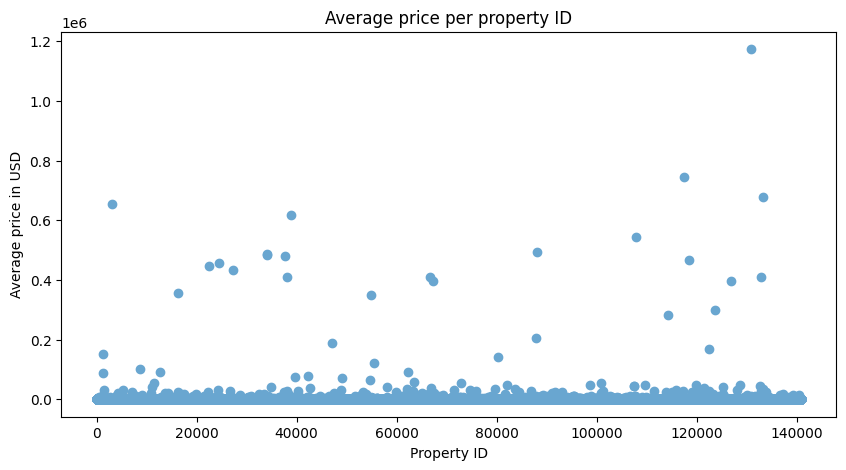

In [93]:
plt.figure(figsize=(10, 5))
plt.scatter(x='prop_id', y='price_usd', data=avg_price_per_property, color=colors[1])
plt.ylabel('Average price in USD')
plt.xlabel('Property ID')
plt.title('Average price per property ID')
plt.show()

In [94]:
# statistics of the average price per property id
avg_price_per_property['price_usd'].describe()

count    1.291130e+05
mean     2.765556e+02
std      7.254487e+03
min      3.375000e+00
25%      7.894250e+01
50%      1.103808e+02
75%      1.568700e+02
max      1.173038e+06
Name: price_usd, dtype: float64

In [95]:
# retrieve the records where the booking_bool is 1
bookings = train_df[train_df['booking_bool'] == 1]
non_bookings = train_df[train_df['booking_bool'] == 0]

# plot the average price per property id for bookings and non-bookings
avg_price_per_property_bookings = bookings.groupby('prop_id')
avg_price_per_property_bookings = avg_price_per_property_bookings['price_usd'].mean().reset_index()

avg_price_per_property_non_bookings = non_bookings.groupby('prop_id')
avg_price_per_property_non_bookings = avg_price_per_property_non_bookings['price_usd'].mean().reset_index()

In [96]:
avg_price_per_property_bookings['price_usd'].describe()

count    4.342800e+04
mean     2.763523e+02
std      1.521050e+04
min      0.000000e+00
25%      7.810750e+01
50%      1.061248e+02
75%      1.455508e+02
max      2.817430e+06
Name: price_usd, dtype: float64

In [97]:
avg_price_per_property_non_bookings['price_usd'].describe()

count    1.286470e+05
mean     2.734454e+02
std      7.231741e+03
min      3.375000e+00
25%      7.900000e+01
50%      1.105519e+02
75%      1.573168e+02
max      1.173038e+06
Name: price_usd, dtype: float64

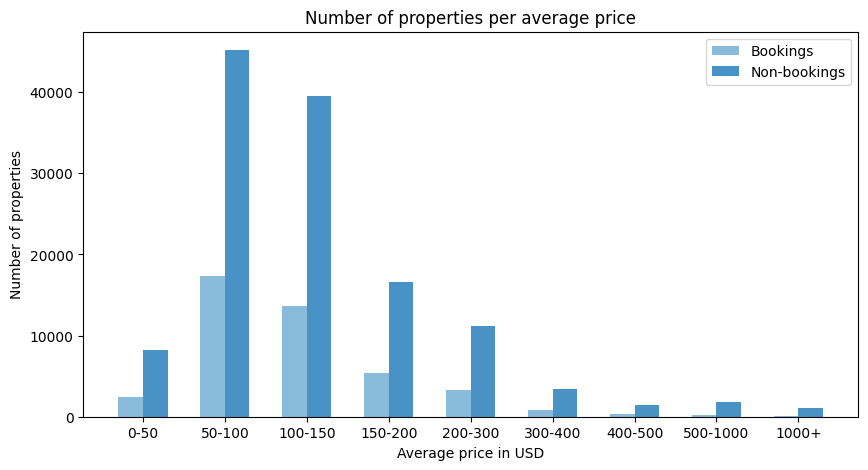

In [98]:
bins = [-0.0001, 50, 100, 150, 200, 300, 400, 500, 1000, 3000000]
# merge the bookings and non-bookings dataframes and include a column with the bin
avg_price_per_property_bookings['bin'] = pd.cut(avg_price_per_property_bookings['price_usd'], bins=bins)
avg_price_per_property_non_bookings['bin'] = pd.cut(avg_price_per_property_non_bookings['price_usd'], bins=bins)

count_bookings = avg_price_per_property_bookings.groupby('bin').count()['price_usd'].reset_index()
count_non_bookings = avg_price_per_property_non_bookings.groupby('bin').count()['price_usd'].reset_index()

# replace the bin values with string values
new_bins = ['0-50', '50-100', '100-150', '150-200', '200-300', '300-400', '400-500', '500-1000', '1000+']
count_bookings['bin'] = new_bins
count_non_bookings['bin'] = new_bins
width = 0.3

plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(count_bookings['bin'])), count_bookings['price_usd'], width, color=colors[0], label='Bookings')
plt.bar(np.arange(len(count_bookings['bin'])) + width, count_non_bookings['price_usd'], width, color=colors[2], label='Non-bookings')
plt.xticks(np.arange(len(count_bookings['bin'])) + width / 2, count_bookings['bin'])
plt.ylabel('Number of properties')
plt.xlabel('Average price in USD')
plt.title('Number of properties per average price')
plt.legend()
plt.show()

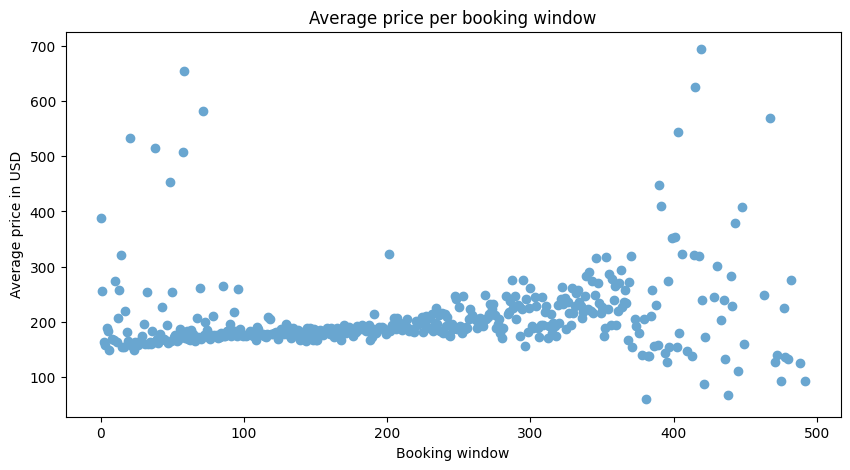

In [103]:
temp = train_df[['srch_booking_window', 'price_usd']]

# plot the average price per booking window
avg_price_per_booking_window = temp.groupby('srch_booking_window')
avg_price_per_booking_window = avg_price_per_booking_window['price_usd'].mean().reset_index()

# eliminate the outliers
avg_price_per_booking_window = avg_price_per_booking_window[avg_price_per_booking_window['price_usd'] < 1000]

plt.figure(figsize=(10, 5))
plt.scatter(x='srch_booking_window', y='price_usd', data=avg_price_per_booking_window, color=colors[1])
plt.ylabel('Average price in USD')
plt.xlabel('Booking window')
plt.title('Average price per booking window')
plt.show()

In [100]:
# check if weekends are more expensive than weekdays
avg_price_per_weekend = train_df[['srch_saturday_night_bool', 'price_usd']].groupby('srch_saturday_night_bool')['price_usd'].mean().reset_index()
print(avg_price_per_weekend)

#number of bookings per weekend
print(len(train_df[train_df["srch_saturday_night_bool"] == 1]))

   srch_saturday_night_bool   price_usd
0                         0  284.689576
1                         1  223.998191
2490145


In [101]:
# check if chain hotels are booked more than independent hotels
book_difference_chain = train_df[['prop_brand_bool', 'booking_bool']].groupby('prop_brand_bool')['booking_bool'].sum().reset_index()
print(book_difference_chain)

   prop_brand_bool  booking_bool
0                0         46625
1                1         91765


In [105]:
train_df["visitor_hist_adr_usd"].describe()

count    252988.000000
mean        176.022659
std         107.254493
min           0.000000
25%         109.810000
50%         152.240000
75%         213.490000
max        1958.700000
Name: visitor_hist_adr_usd, dtype: float64